# Author: Vaghela Samyak M.
# Task1: Prediction Using Supervised Machine Learning.
The task is to predict the percentage of a student based on the number of study hours.

# Question: What will be the predicted Score if the student studies for 9.25 hours/day?
The first thing we need to do is see the relation of the two given variables: hours and score. And we do this as follows:

Step 1: Importing required libraries

In [1]:
#Step1: The first step is to import the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries Successfully Imported!!")

Libraries Successfully Imported!!


In [2]:
#Step2: The second step is to read the dataset from the source.
dataset_url="http://bit.ly/w-data"
dataset=pd.read_csv(dataset_url)
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Step 3: Exploring the dataset
We will explore the dataset in two further steps. First will be knowing the structure of the dataset and the second will be knowing the statistical properties of the data set.

In [3]:
#Step3: The third step is to explore the data in the above mentioned two ways
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Here, we see that our dataset comprises of two columns i.e. it has two variables Hours and Scores.Hours is a float type variable while the score is of integer type. Also, the dataset has 25 entries and thus we have 25 observation in each of the above two columns. Now note that all 25 observations are non-null which means that there is no missing observation in our data. Now the mean number of hours spent studying is 5.01 with a standard deviation of 2.53 while the mean score obtained is 51.48 with the standard deviation 25.29.

# Step 4: Analysing the relationship between the two variables
To analyse the relation ship between the two given variables hours and time the simplest way is to do it using a scatter plot.

Text(0.5, 1.0, 'Scatter plot for Hours and Scores')

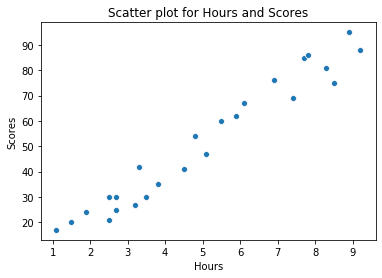

In [4]:
#step4: The fourth step is to analyse the relationship between the variables by plotting a scatter plot
sns.scatterplot(x="Hours",y="Scores", data=dataset)
plt.title("Scatter plot for Hours and Scores")

# Step 5: Data Preparation
First, of all we will reshape our data to divide it into attributes and labels. And then we will split our data into the training and testing sets which will further be used for training the algorithm. To do this we will use sklearn (Scikit-Learn) library's built-in train_test_split() method.

In [5]:
#Step 5(a): First in the fifth step will be reshaping our data
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,1]

In [6]:
#Step 5(b): second in the fifth step is splitting the data into testing and training sets and training the algorithm.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

Here, we use a test size of 0.2 which means that 20% of the data will be used for testing.

# Step 6: Training the Algorithm

In [7]:
#step6: In the sixth step we will train the algorithm
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(x_train.values, y_train.values) 
y_predicted=model.predict(x_train.values)
print("Training of the Algorithm is complete!")

Training of the Algorithm is complete!


# Step 7: Forming the Regression equation

In [8]:
#we extract the value of the intercept and the slope using the linear regression method and for 
α = model.intercept_
β = model.coef_
print("Thus, the regression equation is:-")
print ("y=",α," +",β,"*x")

Thus, the regression equation is:-
y= 2.018160041434683  + [9.91065648] *x


# Step 8: Plotting the regression line

Text(0.5, 1.0, 'Regression Plot(Hours Vs Scoore)')

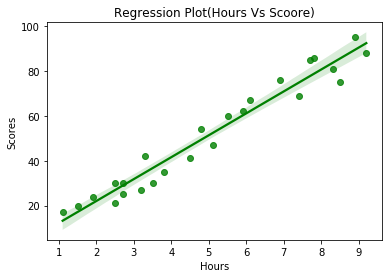

In [9]:
#step8: to plot the regression plot we use the seaborn library
sns.regplot(x="Hours",y="Scores", data=dataset, color="g")
plt.title("Regression Plot(Hours Vs Scoore)")

# Step 9: Prediction for the test dataset
Now we will use the test data split for predicting the scores using the model we obtained from the train split. We know that there 20% of the data was used for the test split and thus 5 observations would be there in the test split for which we will predict the values using the model.

In [10]:
#step9: Prediction for the test data set using the model.predict()
y_predict=model.predict(x_test.values)
print("The predicted score based on the test dataset is:-", y_predict)

The predicted score based on the test dataset is:- [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


# Step 10: Comparison the actual and predicted values
Let, us compare the predicted scores of the test dataset with their orginical scores. To do this we will create a dataframe with the two columns of predicted score and test score.

In [11]:
#Step 10 (a): comparing actual and predicted scores of the students
Comparison_set= pd.DataFrame({"Actual":y_test,"Predicted":y_predict})
Comparison_set

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


Text(0.5, 1.0, 'Comparison plot')

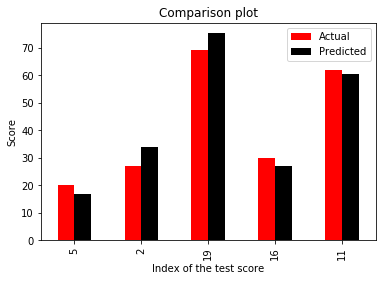

In [12]:
#Step 10 (b): We should compare it visually with a bar graph to get a better understanding of the difference
Comparison_set.plot(kind="bar", color=("r","black"))
plt.xlabel("Index of the test score")
plt.ylabel("Score")
plt.title("Comparison plot")

we see that the acutal and predicted scores of the model are about the same with minute difference which results in mean square error stating the the model is not 100% accurate.

# Step 11: Checking the model accuracy
The accuracy of the model is 94.5% which is pretty high.


In [13]:
#step 11: now we will check the fit of the regression model using the following attributes:
from sklearn import metrics
print("Mean Absolute Error:-", metrics.mean_absolute_error(y_test,y_predict))
print("Mean Squared Error(MSE):-", metrics.mean_squared_error(y_test,y_predict))
print("Root Mean Square error(RMSE):=",np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print("R-square:-", metrics.r2_score(y_test,y_predict))

Mean Absolute Error:- 4.183859899002975
Mean Squared Error(MSE):- 21.5987693072174
Root Mean Square error(RMSE):= 4.6474476121003665
R-square:- 0.9454906892105356


Mean square error is the average squared difference between the estimated values and the actual value. Here we see that MSE is 21.5988 which is not very high since it is the squared value and thus a root mean square error of 4.6574 is also not much.

The R-square value called the coefficient of determination estimates the population proportion of variability in the outcome variable which is accounted by the model. Value close to 1 indicate a good deal of predictive power of the model. And here we see that the r-square value is about 0.95 which indicates a good predictive power of the model.

# Step 12: Solution Step: Predicting the Score of the student who studies for 9.25 hours/day.

In [14]:
#Step12: Here, we will predict the percentage score of the student who studies for 9.25 hours per day by using the predict method we used to predict the test set
x=9.25
model.predict([[9.25]])
#Now as the scores are given as integers thus, we convert this to an integer
result=float(model.predict([[9.25]]))
print("Score:-",round(result,0))

Score:- 94.0


# Conclusion:-
# After fiiting the regression model: for the hours spent studying (independent variable,x) and the score obtained (dependent variable,y) we get a regression equation:
# y = 2.02 + 9.91x
# which has a predictive power of 94.5%.
# Thus, we predict the score of the student who studies for 9.25 hours per day to be 94
# Thank You!